C:\Users\mynam\AppData\Local\Temp\ipykernel_11596\3930143025.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop('id', 1) #removing unwanted column


Best Accurancy =0.9724997473298768
best parameters ={'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 700}
[[1181   68]
 [  19 1496]]


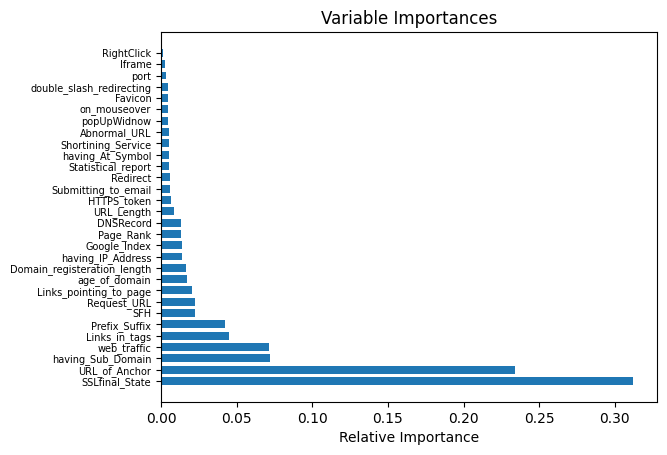

In [1]:
#----------------importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib


#importing the dataset
dataset = pd.read_csv("phishcoop.csv")
dataset = dataset.drop('id', 1) #removing unwanted column

x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

#----------------applying grid search to find best performing parameters 
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train.ravel())
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 
#-------------------------------------------------------------------------

#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train.ravel())

#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#-------------Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])



#-------------plotting variable importance
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()

from urllib.parse import urlparse


# # Load the trained model
# classifier = joblib.load('../final_models/rf_final.pkl')


# Define a function to verify a URL using the trained model
def verify_url(url):
    # Parse the URL and extract its features
    url_features = pd.DataFrame(columns=['url_length', 'hostname_length', 'path_length', 'fd_length', 'tld', 'count-', 'count@', 'count?', 'count%', 'count.', 'count=', 'count-http', 'count-https', 'count-www'])
    parsed_url = urlparse(url)
    url_features.loc[0] = [
        len(url),
        len(parsed_url.hostname),
        len(parsed_url.path),
        parsed_url.path.count('/'),
        parsed_url.hostname.split('.')[-1],
        parsed_url.hostname.count('-'),
        parsed_url.hostname.count('@'),
        parsed_url.hostname.count('?'),
        parsed_url.hostname.count('%'),
        parsed_url.hostname.count('.'),
        parsed_url.query.count('='),
        url.count('http'),
        url.count('https'),
        parsed_url.hostname.startswith('www.')
    ]
    # Make a prediction using the trained model
    prediction = classifier.predict(url_features)[0]
    # Return the result as a string
    if prediction == 1:
        return 'Phishing'
    else:
        return 'Legitimate'
